In [1]:
import librosa
import librosa.display
import IPython.display as ipd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# load audio files

debussy_file = "audio/debussy.wav"
rhcp_file = "audio/redhot.wav"
duke_file = "audio/duke.wav"

debussy , _ = librosa.load(debussy_file)
rhcp, _ = librosa.load(rhcp_file)
rhcp_c, _ = librosa.load(rhcp_file, duration=4)
duke, _ = librosa.load(duke_file)

In [3]:
# extract RMSE with Librosa

FRAME_LENGTH = 1024
HOP_LENGTH = 512

rmse_debussy = librosa.feature.rms(y = debussy, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]
rmse_rhcp = librosa.feature.rms(y = rhcp, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]
rmse_rhcp_c = librosa.feature.rms(y = rhcp_c, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]
rmse_duke = librosa.feature.rms(y = duke, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]

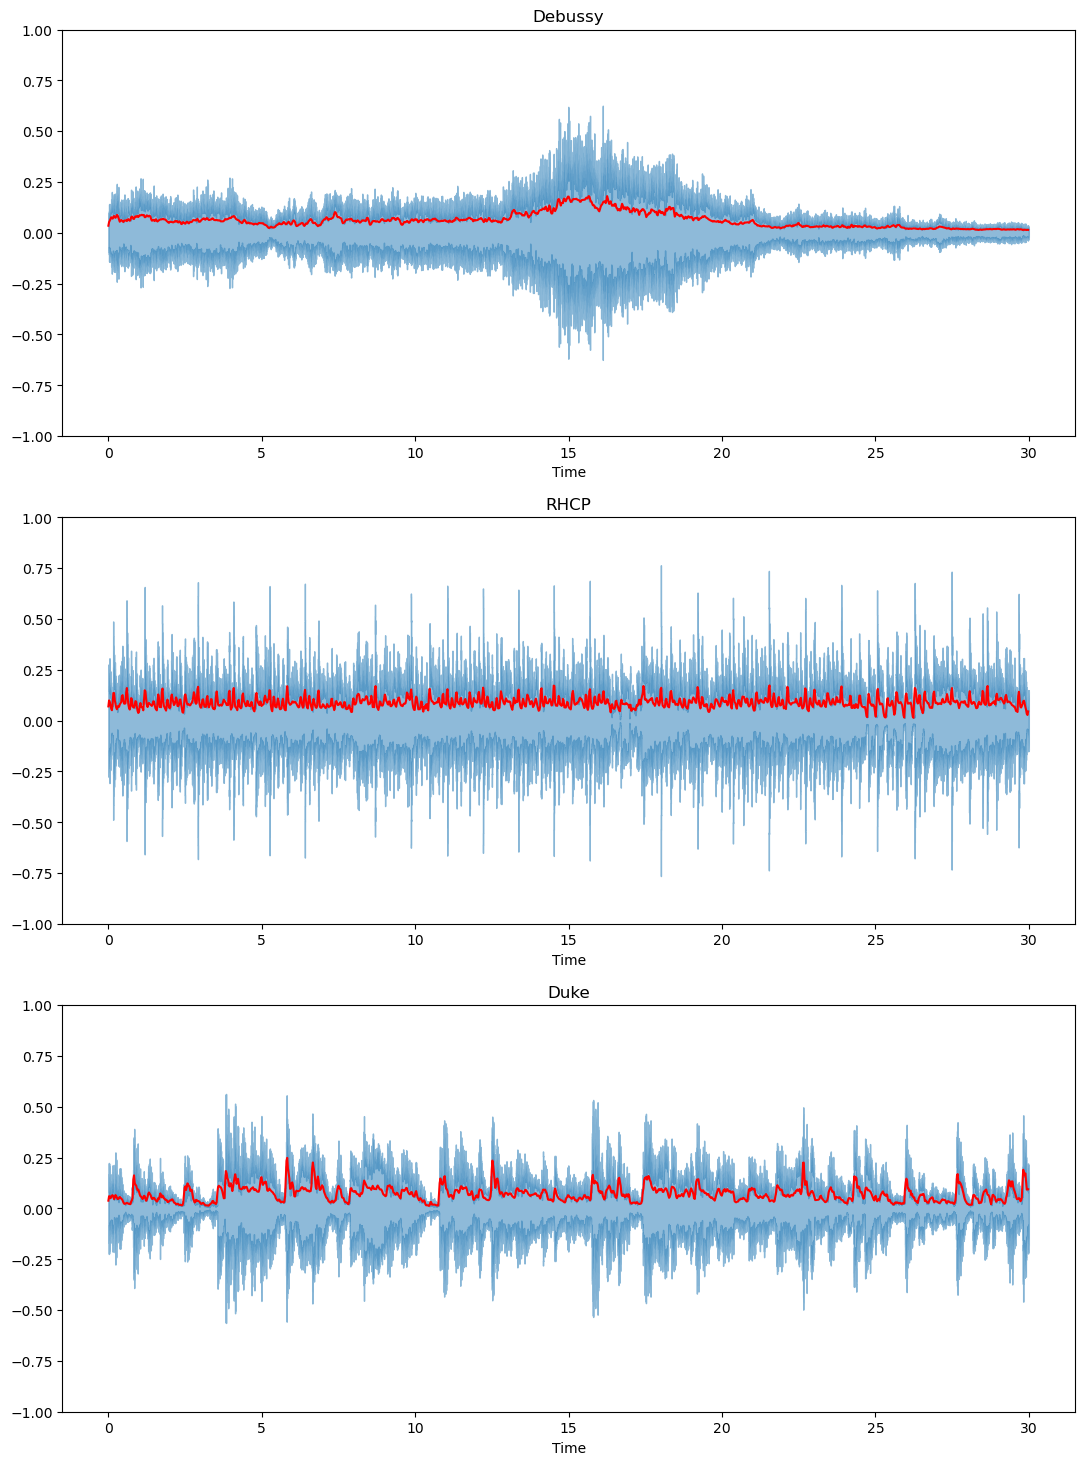

In [4]:
# plot the RMSE

frames = range(0, rmse_debussy.size)
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)

plt.figure(figsize=(15,17)).tight_layout(h_pad=2)

plt.subplot(4,1,1)
librosa.display.waveshow(debussy, alpha = 0.5)
plt.plot(t, rmse_debussy, color = 'r')
plt.title("Debussy")
plt.ylim((-1,1))



plt.subplot(4,1,2)
librosa.display.waveshow(rhcp, alpha = 0.5)
plt.plot(t, rmse_rhcp, color = 'r')
plt.title("RHCP")
plt.ylim((-1,1))

plt.subplot(4,1,3)
librosa.display.waveshow(duke, alpha = 0.5)
plt.plot(t, rmse_duke, color = 'r')
plt.title("Duke")
plt.ylim((-1,1))


plt.subplots_adjust(bottom=0.1, right=0.8, top=1.2)
plt.show()

In [5]:
def rms (signal, frame_length, hop_length):
    rmse = []
    
    for i in range(0, len(signal), hop_length):
        rms_current_frame = np.sqrt(np.sum(signal[i : i + frame_length] ** 2 / frame_length))
        rmse.append(rms_current_frame)
    
    return np.array(rmse)

In [6]:
rmse1_debussy = rms(debussy, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)
rmse1_rhcp = rms(rhcp, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)
rmse1_duke = rms(duke, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)

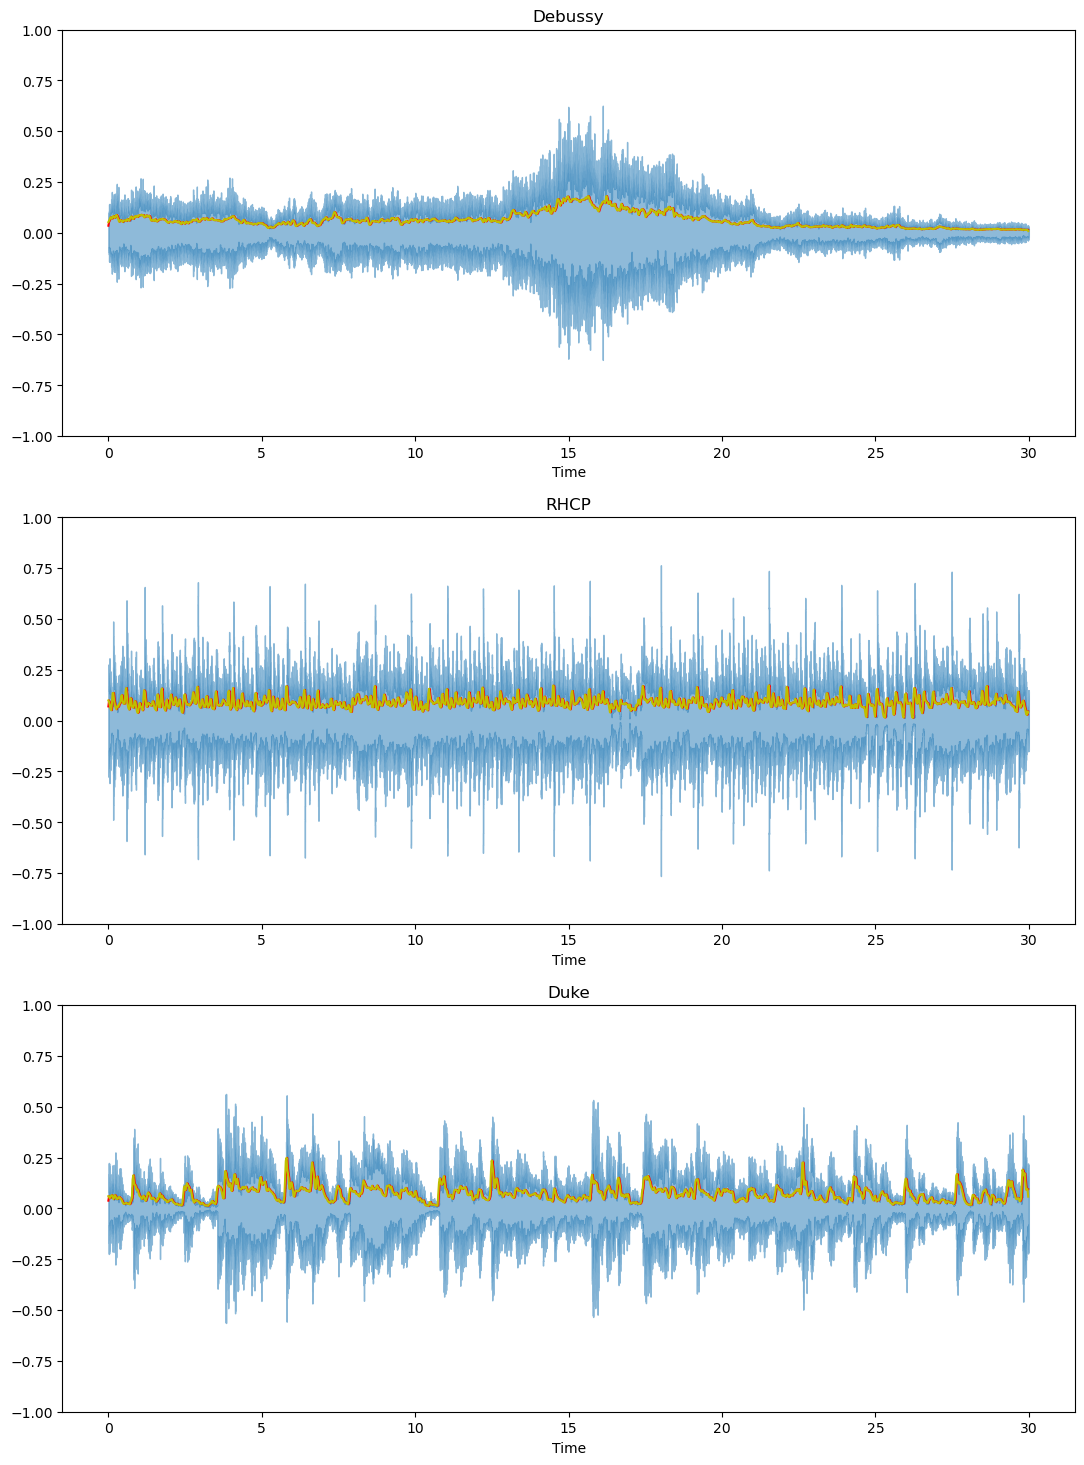

In [7]:
frames = range(0, rmse_debussy.size)
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)

plt.figure(figsize=(15,17)).tight_layout(h_pad=2)

plt.subplot(4,1,1)
librosa.display.waveshow(debussy, alpha = 0.5)
plt.plot(t, rmse_debussy, color = 'r')
plt.plot(t, rmse1_debussy, color = 'y')
plt.title("Debussy")
plt.ylim((-1,1))



plt.subplot(4,1,2)
librosa.display.waveshow(rhcp, alpha = 0.5)
plt.plot(t, rmse_rhcp, color = 'r')
plt.plot(t, rmse1_rhcp, color = 'y')
plt.title("RHCP")
plt.ylim((-1,1))

plt.subplot(4,1,3)
librosa.display.waveshow(duke, alpha = 0.5)
plt.plot(t, rmse_duke, color = 'r')
plt.plot(t, rmse1_duke, color = 'y')
plt.title("Duke")
plt.ylim((-1,1))


plt.subplots_adjust(bottom=0.1, right=0.8, top=1.2)
plt.show()

In [8]:
def signal(audio):
    signal, _ = librosa.load(audio)
    return signal

a_list = []
a_list.append("audio/air_conditioner/47160-0-0-3.wav")
a_list.append("audio/children_playing/105415-2-0-1.wav")
a_list.append("audio/gun_shot/46654-6-0-0.wav")
a_list.append("audio/dog_bark/31323-3-0-2.wav")

a_signal_list = []
for audio in a_list:
    a_signal_list.append(signal(audio))

In [9]:

ac_rms = rms(a_signal_list[0], frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)
cp_rms = librosa.feature.rms(y = a_signal_list[1],frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]
gs_rms = rms(a_signal_list[2], frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)
db_rms = rms(a_signal_list[3], frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)

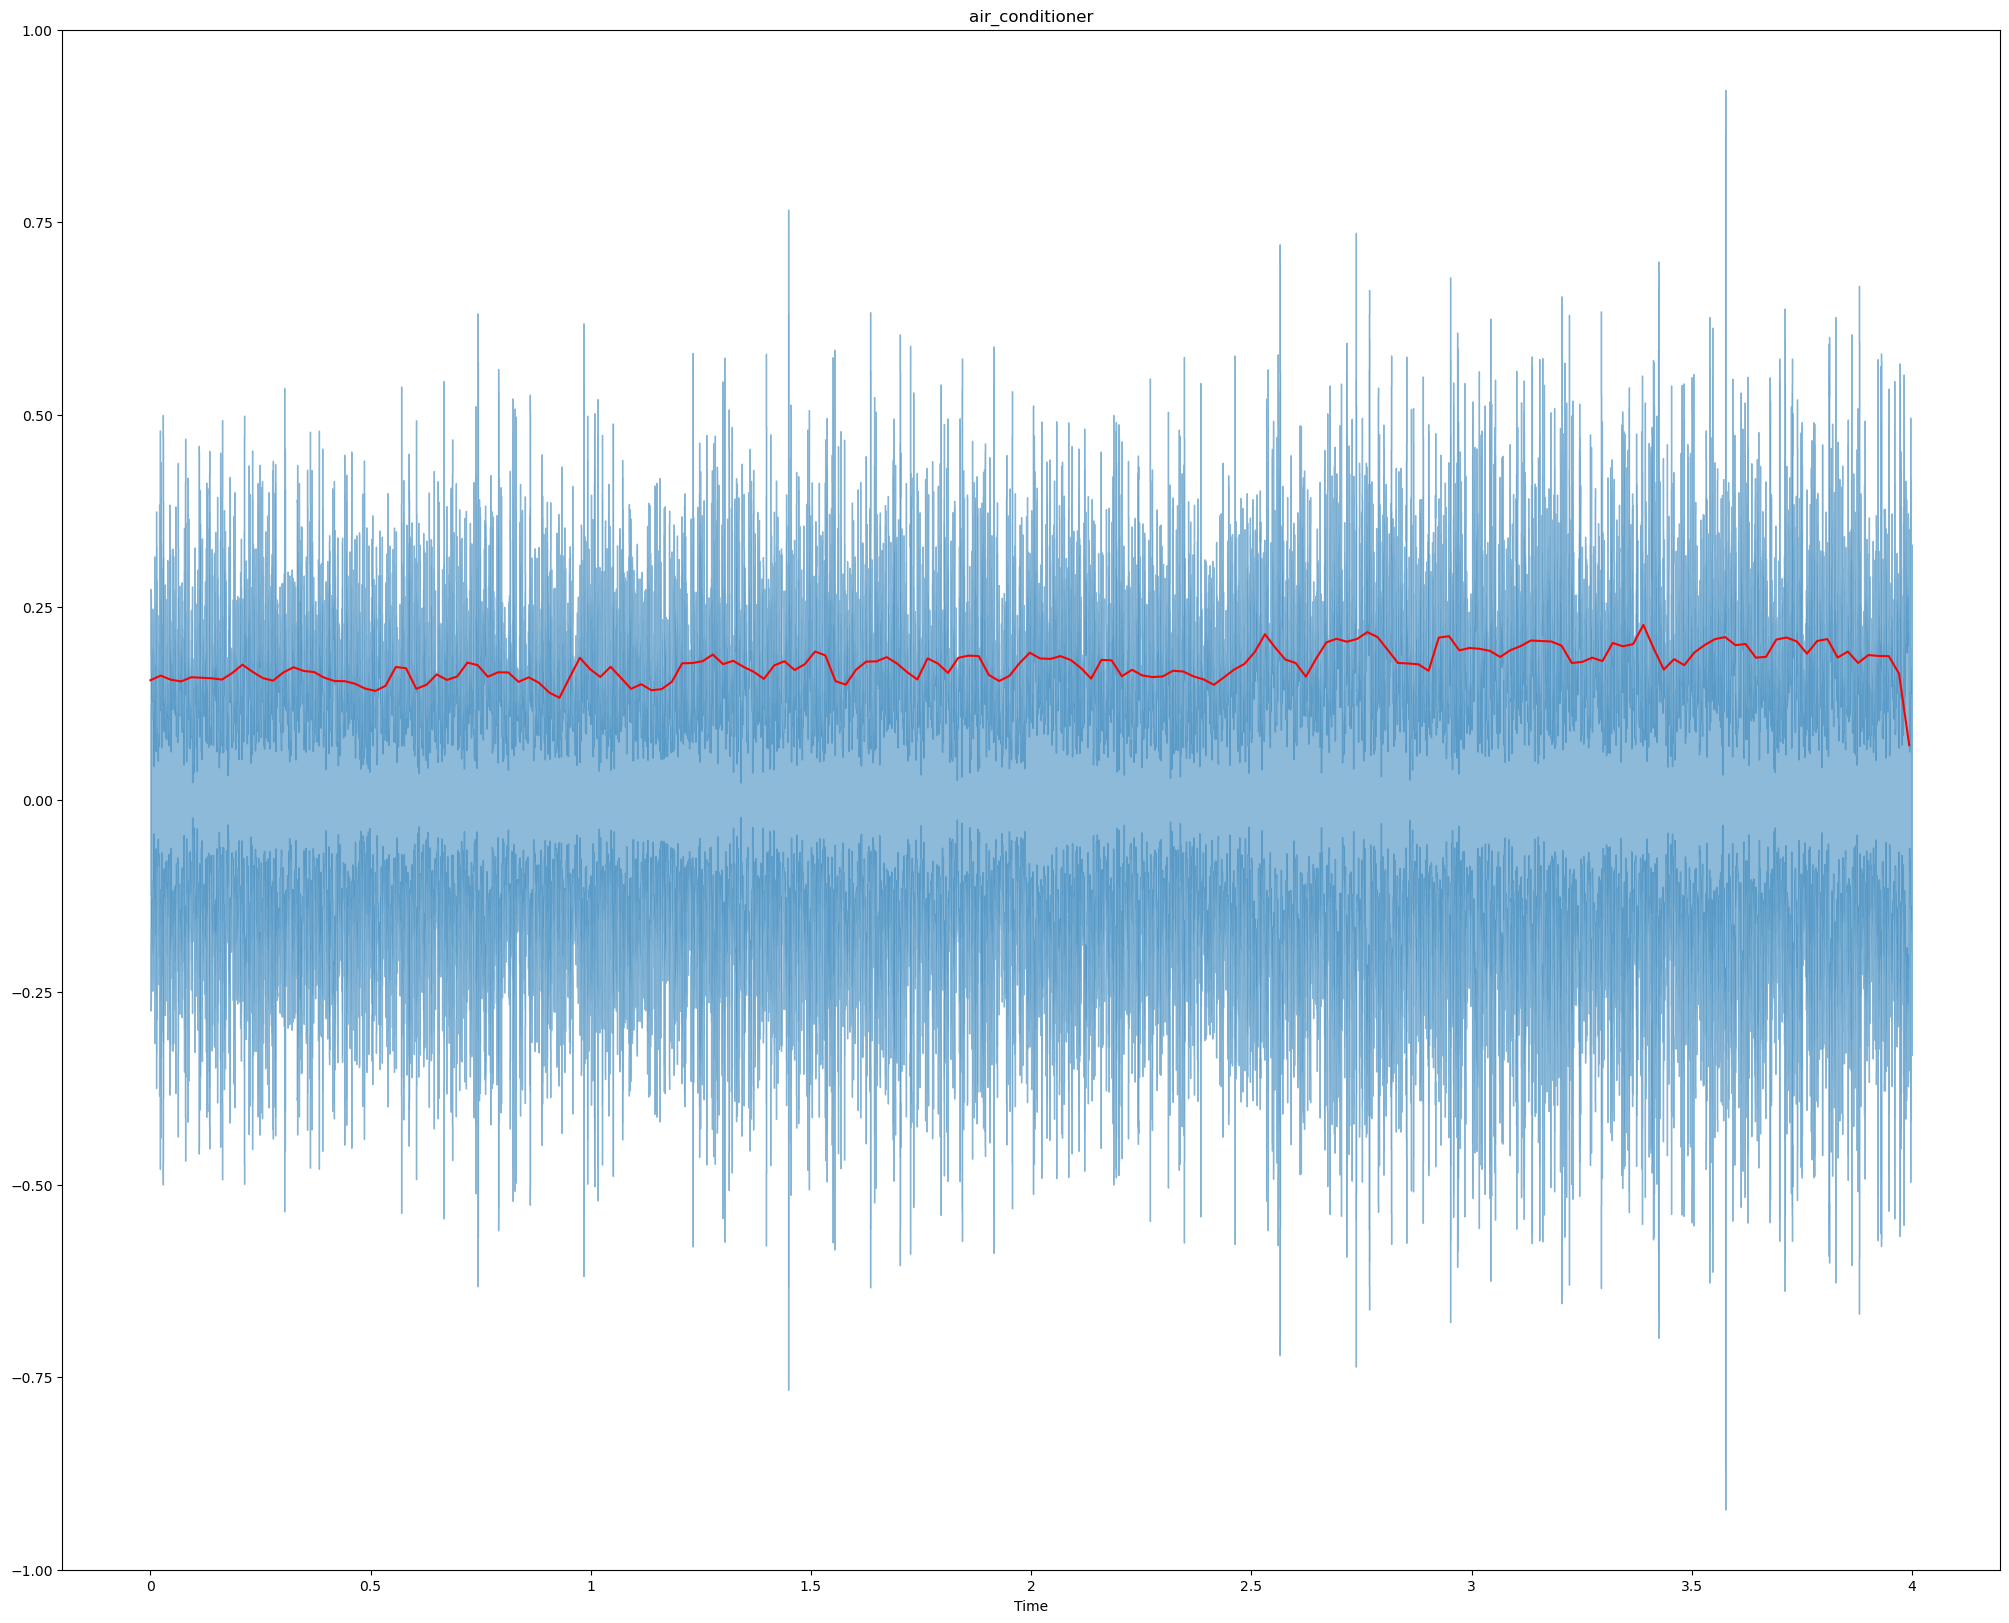

In [10]:
frames = range(0, ac_rms.size)
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)

plt.figure(figsize=(25,20)).tight_layout(h_pad=2)


librosa.display.waveshow(a_signal_list[0], alpha = 0.5)
plt.plot(t, ac_rms, color = 'r')
plt.title("air_conditioner")
plt.ylim((-1,1))
plt.savefig("rms/air_conditioner2.png")
plt.show()

In [11]:
# Zero Crossing Rate
zcr_debussy = librosa.feature.zero_crossing_rate (y = debussy, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]
zcr_rhcp = librosa.feature.zero_crossing_rate (y = rhcp_c, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate (y = duke, frame_length = FRAME_LENGTH, hop_length = HOP_LENGTH)[0]

duke.shape
zcr_rhcp.shape

(173,)

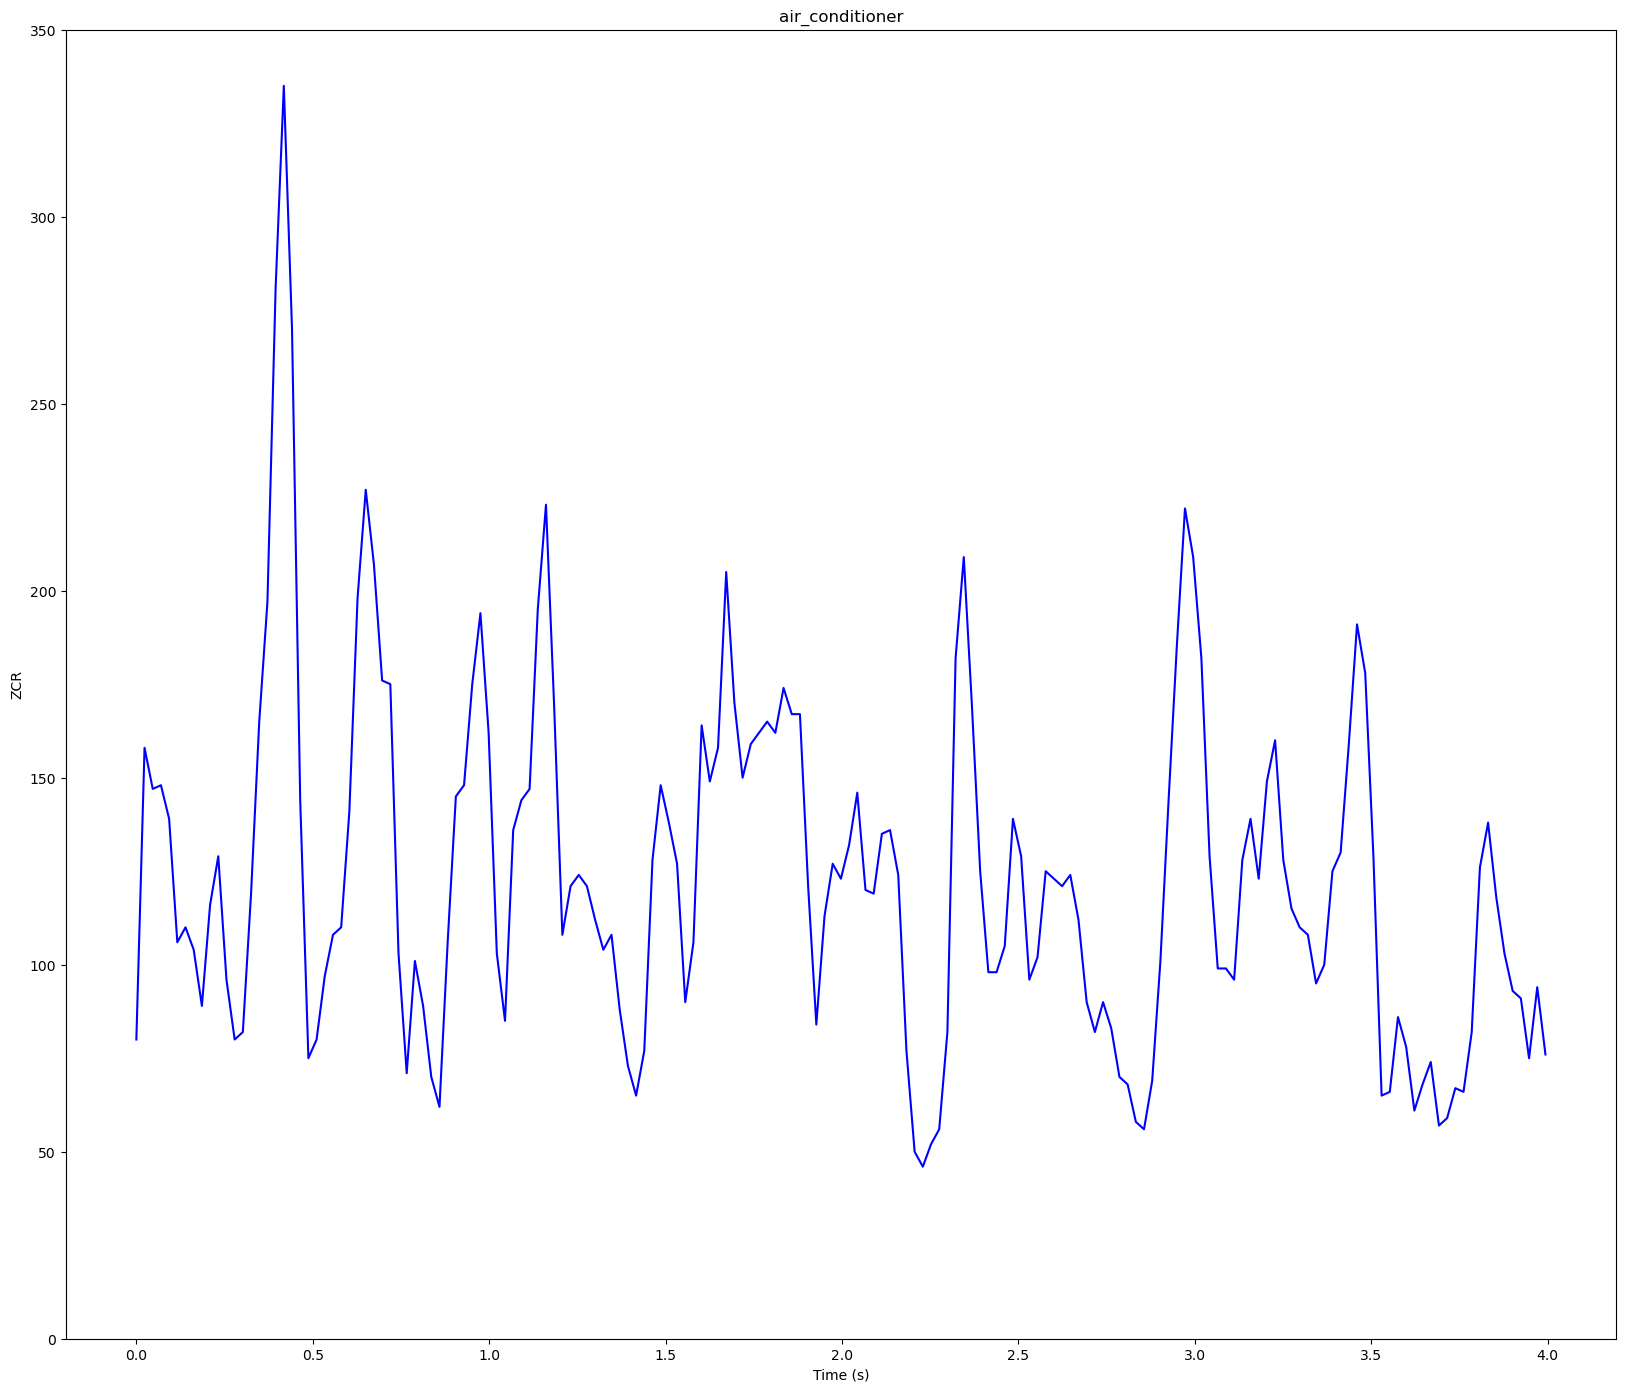

In [12]:
# Visualize ZCR
frames = range(0, rmse_rhcp_c.size)
t = librosa.frames_to_time(frames, hop_length = HOP_LENGTH)

plt.figure(figsize=(20,17)).tight_layout(h_pad=2)

plt.plot(t, zcr_rhcp * FRAME_LENGTH, color = 'b')
plt.title("air_conditioner")
plt.ylim((0,350))
plt.xlabel("Time (s)")
plt.ylabel("ZCR")
plt.savefig("zcr/air_conditioner.png")
plt.show()

In [13]:
FRAME_SIZE = 1024
HOP_LENGTH = 2

def sgn (sample):
    if sample > 0:
        return 1
    elif sample < 0:
        return -1
    else:
        return sample
    
# calculate the zero-crossing
def zero_crossing (signal, frame_size, hop_length):
    zcr = []
    
    # calculate ZCR for each frame
    for frame in range(0,len(signal), hop_length):
        zcr_sample = 0
        for sample in range(frame, frame + frame_size):
            zcr_sample += 0.5 * np.abs(sgn(sample) - sgn(sample + 1))
        zcr.append(zcr_sample)
    
    return np.array(zcr)